# Desafio Módulo 2 - Bootcamp Alura Data Science Aplicada 2

![](https://federacaors.org.br/wp-content/uploads/2019/09/vacina-argumento-pais-contra-600x400.jpg)

## Antonio Drago Caetano
https://www.linkedin.com/in/antoniodragoc/

https://github.com/dragoc1

# Introdução

Para o segundo projeto do Bootcamp de Data Science Aplicada 2, que durante o Módulo 02 foi abordado métodos de tratamento, exploração dos dados e escolha de cores para melhor visualização dos dados, foi proposto como desafio final a análise de dados do programa de imunização nacional ([link](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)).

Para análise foi escolhida as doses aplicadas da vacina BCG que tem como publico-alvo todas as crianças com até um ano de idade.

Nos anos de 2017 e 2018 a BCG, vacina que previne a tuberculose foi a única a atingir a meta anual de cobertura vacinal com cobertura de 96,41% em 2017 e 96,09% em 2018. [[1]](https://federacaors.org.br/bcg-e-a-unica-vacina-a-atingir-meta-de-imunizacao-desde-2017-no-brasil/)


# Objetivos

Analisar as doses de vacinas aplicadas durante o período entre 2000 e 2018, separando os dados por região e por estados;

Proporção do número de doses com a população nascida nos anos em questão;

Observar a quantidade de doses ano após ano e comparar com a quantidade de nascimentos durante o mesmo período.


# Análises
- Número de doses;
- Número de nascidos vivos;
- Porcentagem da população com até um ano que recebeu a vacina;
- Comparação do número de doses aplicadas com o número de nascimentos no período.


# Importação das bibliotecas

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import seaborn as sns
import warnings
import datetime
from datetime import datetime, date

sns.set_style("darkgrid")

#ignorar os avisos do python
warnings.filterwarnings('ignore')
# Fomatação do Pandas
#pd.options.display.float_format='{:.2f}'.format


# Definindo funções


In [76]:
def estado_index(data):
    data['Unidade da Federação'] = data['Unidade da Federação'].str[3:]
    data = data.set_index(data.columns[0])
    data.index.names = ['uf']
    return data

In [77]:
def coluna_regiao(data):
    # https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python

    # Separando o número da ciadade da coluna "Unidade da Federação" pelo caraceter de espaço entre o número e o estado.
    a = data['Unidade da Federação'].str.split(' ', 1, expand = True)
    #df.insert(value = a[0], column = 'Número do Estado', loc = 0)
    # Guardando o número separado
    c = a[0]

    # Substituindo pelo estado sem o número antes do nome
    data['Unidade da Federação'] = a[1]


    # Criando uma coluna com o primeiro caracter de cada uma das linhas da coluna 'Número do Estado'
    a = c.str[:1]

    # Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
    dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Centro Oeste','5':'Sul'}
    regiao = a.replace(dict_regiao,regex=True)

    data.insert(value = regiao, column = 'Região', loc = 1)

    # Utilizando a coluna de estados como Index
    data = data.set_index('Unidade da Federação')
    return data

    #usaveis.head(10)

In [78]:
def lineplot(data,x,y,hue, titulo, x_label, y_label):
    """
    Parâmetros: data, x, y, hue, titulo, x_label, y_label

    Descrição: Plot de um gráfico de linhas que já organiza na melhor distribuição da paleta de cores
    
    """

    # Entradas
    plt.figure(figsize = (16,9))
    ax = sns.lineplot(
        data = data, 
        x = x , 
        y = y, 
        hue = hue, 
        palette= sns.color_palette('rocket_r', len(plot[hue].unique()))
        )
    
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} M"))

    # Legenda e label    
    ax.set_title(titulo, fontsize = 20)  
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)


    plt.show()

In [79]:
def plot_semana(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['last_available_confirmed'], ascending=False)
    x = 'epidemiological_week'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['last_available_date'].max())
    x_label = 'Semana epidemiológica'
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    plt.vlines(
        x = 54, 
        ymin = 0, 
        ymax = data[y].max(),
        ls = '--', color ='black', alpha = 0.4)
    plt.text(53,data[y].max()/2,'2021',rotation=90, fontsize = 12,color ='black', alpha = 0.4)
    ax;

In [80]:
def plot_last_year(data,ylabel,title, palette):

    """

    Entradas: data,ylabel,title, palette

    Descrição: inputar o dataframe, o ylabel desejado, título e paleta de cores desejada


    """
    
    last_year = data.columns[-1]
    df_plot = data.sort_values(by=last_year,ascending=False)

    plt.figure(figsize=(12,9))
    ax = sns.barplot(
        data = df_plot,
        x = df_plot.index,
        y = last_year,
        palette= sns.color_palette(palette, len(df_plot.index.unique()))        
    )


    ax.set_xlabel('')
    ax.set_ylabel(ylabel)    
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    plt.title(title, fontsize = 18)
    plt.xticks(rotation = 70)
    plt.legend('')
    plt.show()

# Importação dos dados

In [81]:
df_bcg = pd.read_csv(r'./dados/doses_bcg.csv',encoding= 'ISO-8859-1', sep=';', skiprows=4, skipfooter=20,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df_bcg = df_bcg.drop('Total', axis = 1)

# Limpando a coluna 'Unidade da Federação'
df_bcg = coluna_regiao(df_bcg)

# Separando o dataframe por Região
bcg_regiao = df_bcg.groupby('Região').sum()

# Salvando o dataframe por Estados
bcg_estados = df_bcg.drop(columns='Região')

In [82]:
df_born = pd.read_csv(r'./dados/nascimentos_tabnet.csv',encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=13,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df_born = df_born.drop('Total',axis = 1)

# Limpando a coluna 'Unidade da Federação'
df_born = coluna_regiao(df_born)

# Separando o dataframe por Região
born_regiao = df_born.groupby('Região').sum()

# Salvando o dataframe por Estados
born_estados = df_born.drop(columns='Região')

# Análise por Região

## Nascimentos por região

In [83]:
born_regiao.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Região,,,,,,,,,,,,,,,,,,,
Centro Oeste,451061,415929,406057,389578,397992,391834,379027,362857,371482,366344,369856,378000,381531,386755,396105,406232,391548,397323,395674
Nordeste,926007,942887,930010,930289,910902,925577,887330,878679,888418,865318,841386,851181,833013,821903,833592,847082,796766,818068,837591
Norte,291049,299005,300866,311128,309039,314514,317265,311458,321551,310254,305865,313029,307430,312378,320674,319770,306530,311509,318030
Sudeste,1305543,1229832,1194795,1180917,1178817,1171738,1139525,1122863,1130501,1119455,1123910,1144213,1153422,1148317,1183689,1196970,1128096,1152539,1147601
Sul,233101,227821,227674,226339,229798,231431,221781,215471,222876,220210,220851,226737,230393,234674,245199,247614,234860,244096,246036


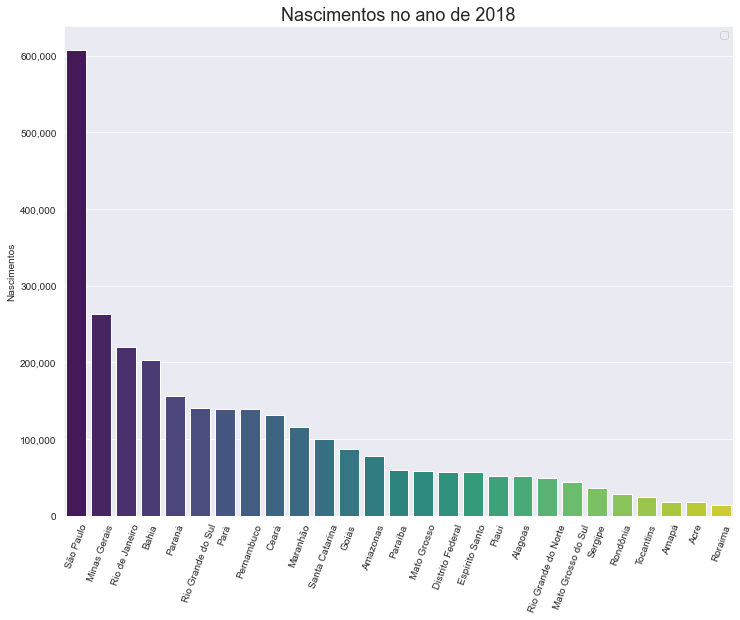

In [84]:
plot_last_year(born_estados, 'Nascimentos', 'Nascimentos no ano de '+born_estados.columns[-1], 'viridis')

In [85]:
plot = born_regiao
plot = plot.T
plot.index.name = 'data'
plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)

# dividindo por 1 Milhão para melhorar a visualização
plot['value'] = plot['value']/1e6

In [86]:
plot.head()

,data,Região,value
0,2000,Centro Oeste,0.451061
1,2001,Centro Oeste,0.415929
2,2002,Centro Oeste,0.406057
3,2003,Centro Oeste,0.389578
4,2004,Centro Oeste,0.397992


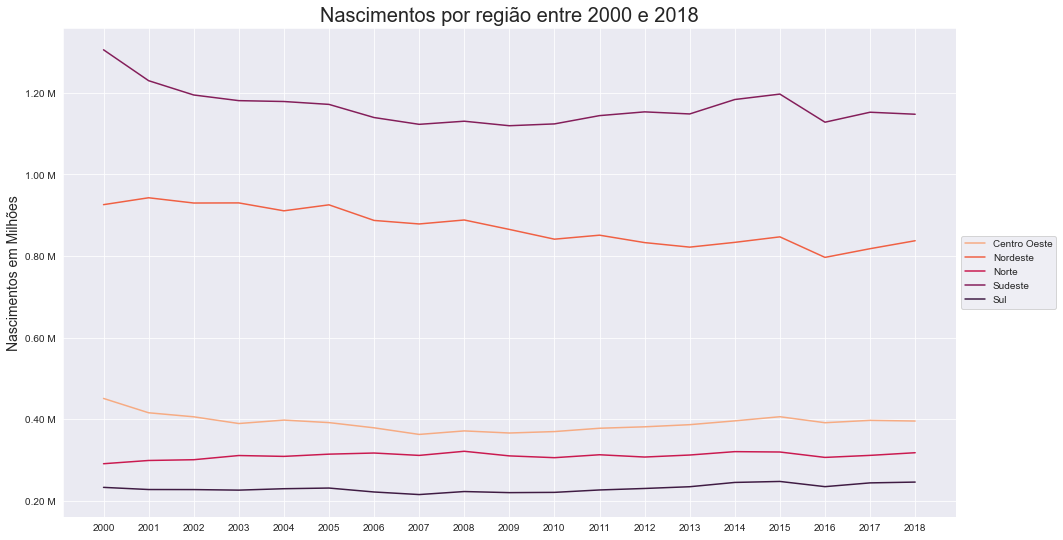

In [87]:
lineplot(plot, 'data', 'value', 'Região', 'Nascimentos por região entre 2000 e 2018', '', 'Nascimentos em Milhões')

## Vacinas BCG por região

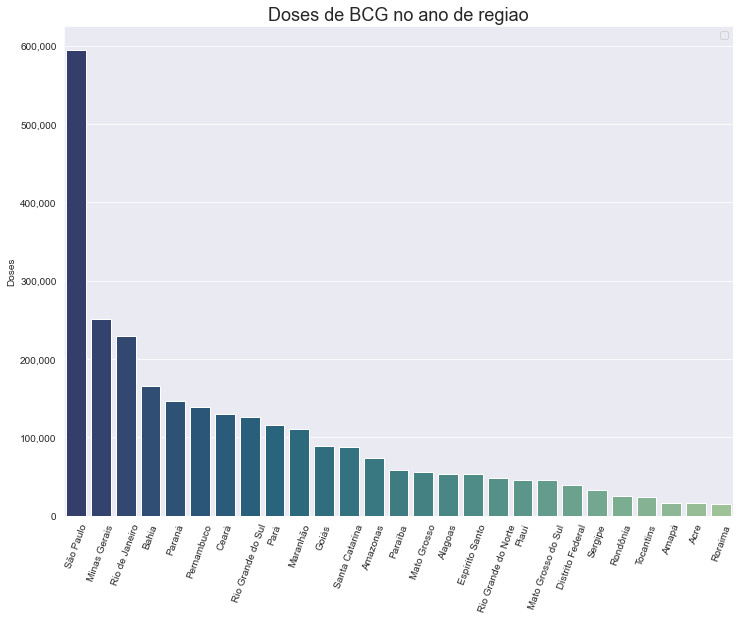

In [99]:
plot_last_year(bcg_estados, 'Doses', 'Doses de BCG no ano de '+born_estados.columns[-1], 'crest_r')

In [88]:
plot = bcg_regiao
plot = plot.T
plot.index.name = 'data'
plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)

# dividindo por 1 Milhão para melhorar a visualização
plot['value'] = plot['value']/1e6

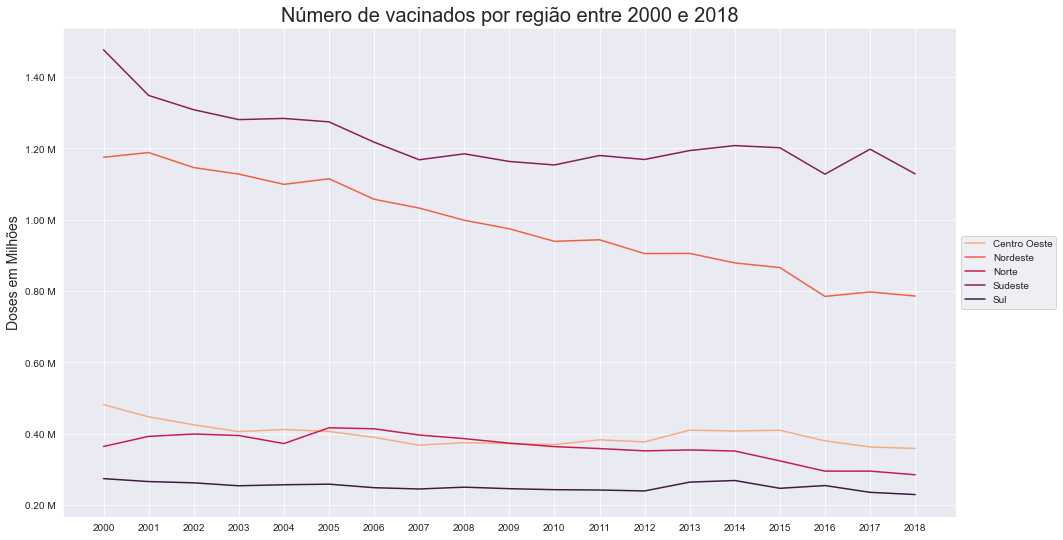

In [89]:
lineplot(plot, 'data', 'value', 'Região', 'Número de vacinados por região entre 2000 e 2018', '', 'Doses em Milhões')

## Relação entre doses de vacina e nascimentos

In [90]:
plot = bcg_regiao/born_regiao
plot = plot.T
plot.index.name = 'data'
plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)
#plot['value'] = plot['value']

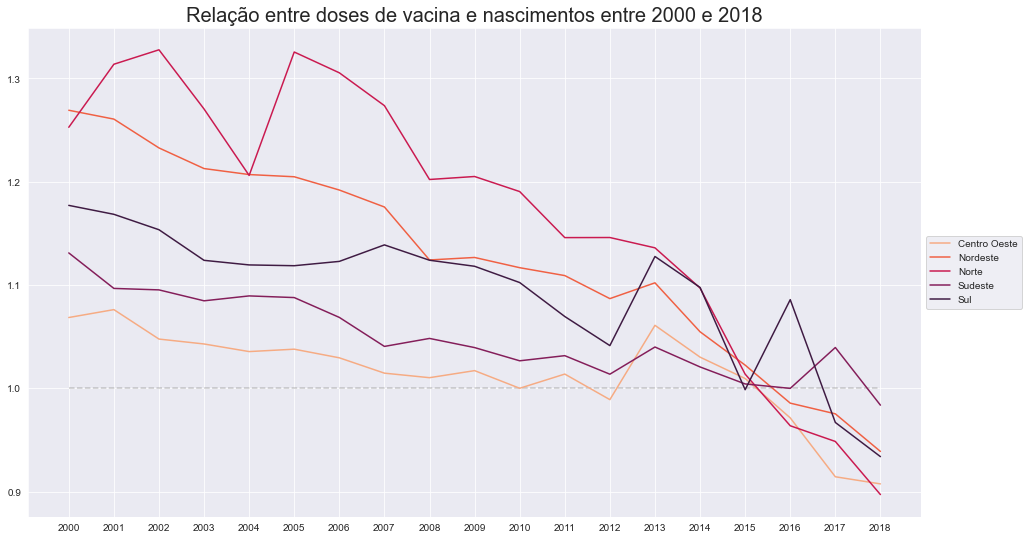

In [111]:
data = plot
x = 'data'
y = 'value'
hue = 'Região'
title = 'Relação entre doses de vacina e nascimentos entre 2000 e 2018'
x_label = ''
y_label = ''

plt.figure(figsize = (16,9))
ax = sns.lineplot(
    data = data,
    x = x , 
    y = y, 
    hue = hue, 
    palette= sns.color_palette('rocket_r', len(plot[hue].unique()))
    )
    
# Legenda e label    
ax.set_title(title, fontsize = 20)  
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(x_label, fontsize= 14)
ax.set_ylabel(y_label, fontsize = 14)
ax.hlines(y = 1, xmin= plot['data'].min(), xmax = plot['data'].max(), linestyles= '--', color= 'grey', alpha = 0.4)  

plt.show()

Fica muito claro que a relação entre número de vacinados e a quantidade de nascimentos tem diminuido e nos últimos anos a situação tem se agravado cada vez mais.

In [103]:
(df_bcg[df_bcg.columns[-1]]/df_born[df_born.columns[-1]]).sort_values()

Unidade da Federação
Distrito Federal       0.682444
Bahia                  0.816294
Pará                   0.825454
Piauí                  0.876703
Santa Catarina         0.877247
Rondônia               0.882960
Rio Grande do Sul      0.896217
Amapá                  0.913073
Acre                   0.917458
Paraná                 0.936599
Sergipe                0.937893
Espírito Santo         0.945631
Amazonas               0.955142
Minas Gerais           0.955449
Mato Grosso            0.959572
Maranhão               0.964431
São Paulo              0.978554
Paraíba                0.979315
Tocantins              0.979432
Ceará                  0.990999
Rio Grande do Norte    0.996443
Pernambuco             0.997828
Goiás                  1.027305
Alagoas                1.034151
Rio de Janeiro         1.041049
Mato Grosso do Sul     1.042292
Roraima                1.136913
Name: 2018, dtype: float64

# Conclusões

# Referências 

1 - https://federacaors.org.br/bcg-e-a-unica-vacina-a-atingir-meta-de-imunizacao-desde-2017-no-brasil/